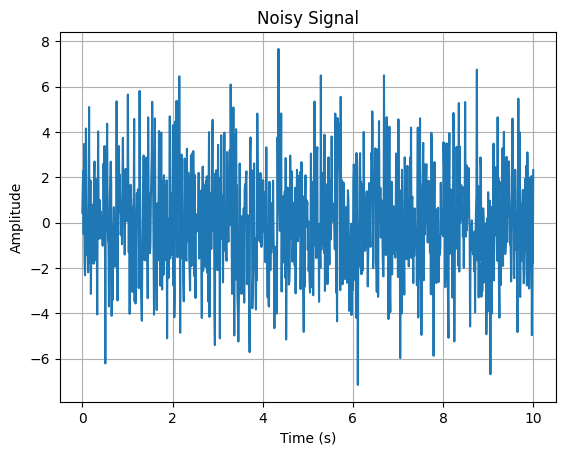

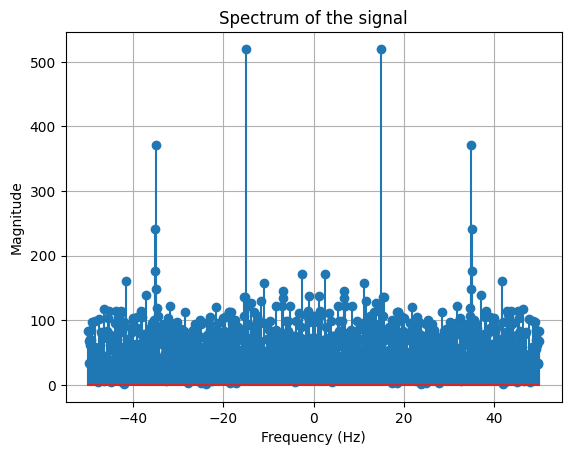

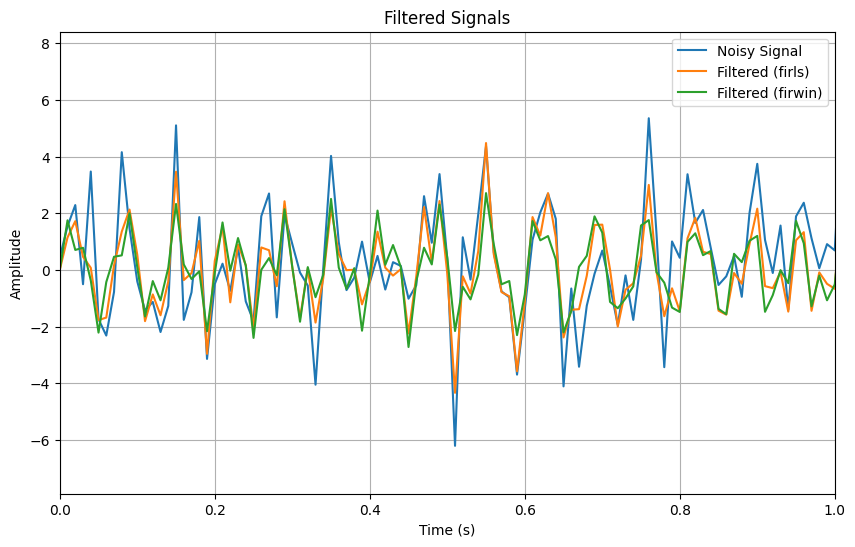

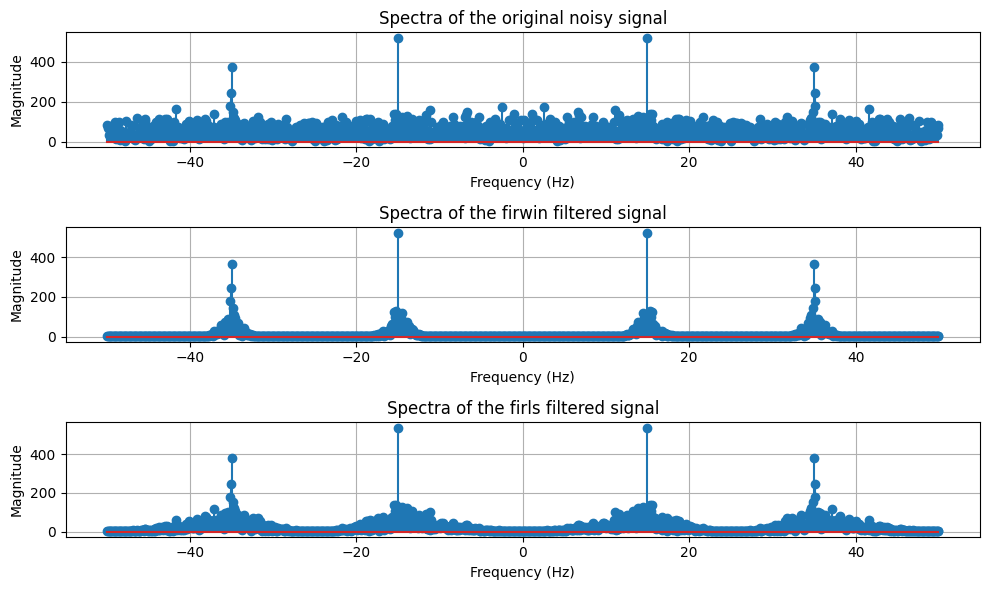

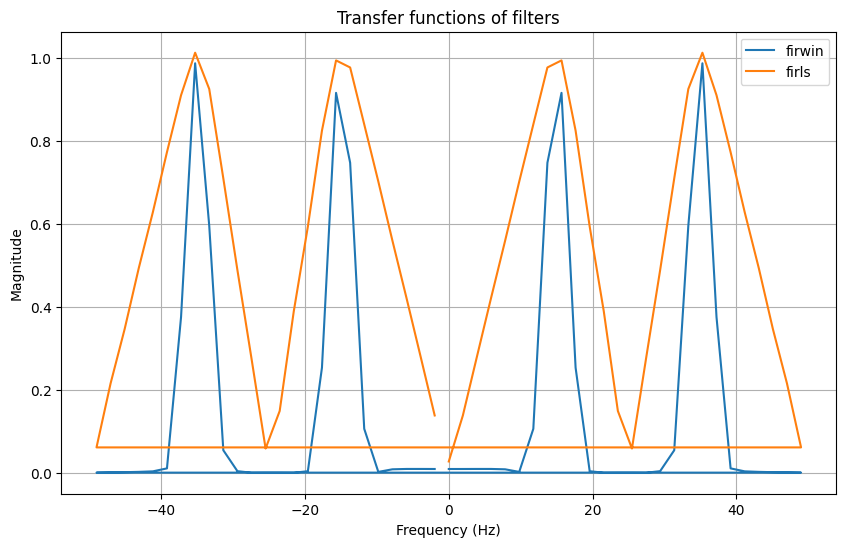

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Load data from .npz file
data = np.load('signal_filtering.npz')
signal_noise = data['signal_noise']
t = data['t']
fs = 1 / np.mean(np.diff(t))

# Plot the noisy signal
plt.figure()
plt.plot(t, signal_noise, label='Noisy Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Noisy Signal')
plt.grid()
plt.show()

# Calculate the FFT spectrum
fft_signal = np.abs(np.fft.fft(signal_noise))
frequencies = np.fft.fftfreq(len(signal_noise), 1/fs)

# Plot the spectrum using plt.stem()
plt.figure()
plt.stem(frequencies, fft_signal)
plt.title('Spectrum of the signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

# From the spectrum one can see that the frequency components of the signal are 15 and 35 Hz
cutoff_freq1 = 15.0  # Frequency component 1
cutoff_freq2 = 35.0  # Frequency component 2

# Design a firwin filter with two passbands: one round 15 Hz and one around 35 Hz. Everything else is filtered out
firwin_filter = signal.firwin(51, [cutoff_freq1-1, cutoff_freq1+1, cutoff_freq2-1, cutoff_freq2+1],
                              pass_zero=False, fs=fs)

# Design a similar filter with firls
firls_filter = signal.firls(51, np.array([[0, cutoff_freq1-1], [cutoff_freq1-1, cutoff_freq1+1],
                                           [cutoff_freq1+1, cutoff_freq1+10], [cutoff_freq2-10, cutoff_freq2-1],
                                           [cutoff_freq2-1, cutoff_freq2+1], [cutoff_freq2+1, 0.5*fs]]),
                            [[0, 1], [1, 1], [1, 0], [0, 1], [1, 1], [1, 0]], fs=fs)

# Apply filters to the signal in time domain
filtered_signal_firwin = signal.filtfilt(firwin_filter, 1, signal_noise)
filtered_signal_firls = signal.filtfilt(firls_filter, 1, signal_noise)

# Plot the filtered signals
plt.figure(figsize=(10,6))
plt.plot(t, signal_noise, label='Noisy Signal')
plt.plot(t, filtered_signal_firls, label='Filtered (firls)')
plt.plot(t, filtered_signal_firwin, label='Filtered (firwin)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Filtered Signals')
plt.legend()
plt.grid()
plt.xlim([0, 1])
plt.show()

# Plot the spectra of the filtered signals
fft_filtered_firls = np.abs(np.fft.fft(filtered_signal_firls))
fft_filtered_firwin = np.abs(np.fft.fft(filtered_signal_firwin))

plt.figure(figsize=(10,6))
plt.subplot(3, 1, 1)
plt.stem(frequencies, fft_signal)
plt.title('Spectra of the original noisy signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()

plt.subplot(3, 1, 2)
plt.stem(frequencies, fft_filtered_firwin)
plt.title('Spectra of the firwin filtered signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()

plt.subplot(3, 1, 3)
plt.stem(frequencies, fft_filtered_firls)
plt.title('Spectra of the firls filtered signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.tight_layout()
plt.show()

# Plot transfer functions of filters
plt.figure(figsize=(10,6))
fft_firwin = np.abs(np.fft.fft(firwin_filter))
frequencies = np.fft.fftfreq(len(firwin_filter), 1/fs)
fft_firls = np.abs(np.fft.fft(firls_filter))
plt.plot(frequencies, fft_firwin, label='firwin')
plt.plot(frequencies, fft_firls, label='firls')
plt.title('Transfer functions of filters')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid()
plt.show()